<font face="Georgia" size="3" color="#007acc">
   <div align="center">
    <h1><strong>Tecnológico de Monterrey</strong></h1>
        <h1><strong>Campus Querétaro</strong></h1>
        <h1>Analítica de datos y herramientas de inteligencia artificial II</h1>
        <h3>Grupo 101</h3>
    <h4><strong>Actividad 4 (Regresión Lineal Simple)</strong></h4>
           <h4>Ana Michele Hay Robles</h4>
           <h4>A01378047</h4>
           <h4>26 de septiembre 2023</h4>
    </div>

</font>
</div>

In [72]:
'''
INSTRUCCIONES:
Crear un nuevo repositorio con el nombre: Regresión Lineal
Agregar el archivo: DF_México.csv
Realiza las acciones de preprocesamiento necesarias: Nulos y Outliers
Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.
“host_acceptance_rate vs host_response_rate”

“review_scores_location vs review_scores_cleanliness”

“host_acceptance_rate vs price”

“availability_365 vs number_of_reviews”

“host_acceptance_rate vs number_of_reviews ”

“reviews_per_month vs review_scores_communication”

 

Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento elegido, utilizando la variable con mayor correlación.
Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación elegido.
Crear los archivos requeridos en Google Colab y respaldarlos en GitHub.
Subir el link del repositorio en CANVAS para “Evaluación”



'''



'\nINSTRUCCIONES:\nCrear un nuevo repositorio con el nombre: Regresión Lineal\nAgregar el archivo: DF_México.csv\nRealiza las acciones de preprocesamiento necesarias: Nulos y Outliers\nAnalizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”, utilizando Python y Google Colab, obtener los datos y gráficos requeridos en cada caso.\n“host_acceptance_rate vs host_response_rate”\n\n“review_scores_location vs review_scores_cleanliness”\n\n“host_acceptance_rate vs price”\n\n“availability_365 vs number_of_reviews”\n\n“host_acceptance_rate vs number_of_reviews ”\n\n“reviews_per_month vs review_scores_communication”\n\n \n\nCrear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento elegido, utilizando la variable con mayor correlación.\nRealizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de 

In [88]:
# Importar librerías
from turtle import color

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score

from colorama import Fore, Style


In [74]:
df = pd.read_csv('DF_Mexico.csv')

In [75]:
# Filtramos el df para quedarnos con las columnas que nos interesan

df = df[['host_acceptance_rate', 'host_response_rate', 'review_scores_location', 'review_scores_cleanliness', 'price', 'availability_365', 'number_of_reviews', 'reviews_per_month', 'review_scores_communication', 'room_type']]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   host_acceptance_rate         22181 non-null  object 
 1   host_response_rate           21133 non-null  object 
 2   review_scores_location       20571 non-null  float64
 3   review_scores_cleanliness    20573 non-null  float64
 4   price                        24224 non-null  object 
 5   availability_365             24224 non-null  int64  
 6   number_of_reviews            24224 non-null  int64  
 7   reviews_per_month            20628 non-null  float64
 8   review_scores_communication  20572 non-null  float64
 9   room_type                    24224 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 1.8+ MB


In [77]:
df.head()

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,room_type
0,NaN,100%,5.00,4.95,"$1,434.00",324,21,0.19,4.95,Entire home/apt
1,NaN,NaN,4.95,4.88,$830.00,346,61,0.54,5.00,Entire home/apt
2,90%,100%,4.58,4.71,"$1,469.00",87,39,0.31,4.92,Entire home/apt
3,NaN,NaN,NaN,NaN,"$3,658.00",363,0,NaN,NaN,Entire home/apt
4,86%,100%,4.98,4.70,"$18,000.00",357,64,0.46,4.78,Entire home/apt


# Procesamiento de valores nulos

In [78]:
# Mostrar valores nulos
def df_nulos(df):
    df_nulos = pd.DataFrame({
        'Count of Null Values': df.isnull().sum(),
        'Null Values Percentage %': round(df.isnull().sum() / len(df) * 100, 2),
        'Data Type': df.dtypes,
        'First Value': df.iloc[0]
    })
    # pd.set_option('display.max_rows', None)
    return df_nulos

df_nulos(df)

,Count of Null Values,Null Values Percentage %,Data Type,First Value
host_acceptance_rate,2043,8.43,object,NaN
host_response_rate,3091,12.76,object,100%
review_scores_location,3653,15.08,float64,5.0
review_scores_cleanliness,3651,15.07,float64,4.95
price,0,0.00,object,"$1,434.00"
availability_365,0,0.00,int64,324
number_of_reviews,0,0.00,int64,21
reviews_per_month,3596,14.84,float64,0.19
review_scores_communication,3652,15.08,float64,4.95
room_type,0,0.00,object,Entire home/apt


In [79]:
df.head()

,host_acceptance_rate,host_response_rate,review_scores_location,review_scores_cleanliness,price,availability_365,number_of_reviews,reviews_per_month,review_scores_communication,room_type
0,NaN,100%,5.00,4.95,"$1,434.00",324,21,0.19,4.95,Entire home/apt
1,NaN,NaN,4.95,4.88,$830.00,346,61,0.54,5.00,Entire home/apt
2,90%,100%,4.58,4.71,"$1,469.00",87,39,0.31,4.92,Entire home/apt
3,NaN,NaN,NaN,NaN,"$3,658.00",363,0,NaN,NaN,Entire home/apt
4,86%,100%,4.98,4.70,"$18,000.00",357,64,0.46,4.78,Entire home/apt


In [80]:
# Cambiamos los valores de las columnas que son porcentajes a valores numéricos
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
# Convertimos los valores de la columna a numéricos
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'])
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'])

# Quitamos las comas y el signo de pesos de la columna price
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
# Convertimos los valores de la columna a numéricos
df['price'] = pd.to_numeric(df['price'])

In [81]:
# Las columnas que tienen el 100% de valores nulos, se eliminan del dataset

df_nulos_100 = df_nulos(df).sort_values(by='Null Values Percentage %', ascending=False)
df_nulos_cols = df_nulos_100[df_nulos_100['Null Values Percentage %'] == 100].index
df_nulos_cols

# Eliminar columnas con 100% de valores nulos
df = df.drop(df_nulos_cols, axis=1)



In [82]:
# Los valores nulos de las columnas numéricas se sustituyen por la media de su respectiva columna
# Para las columnas categóricas se sustituyen por la moda de su respectiva columna


# Obtenemos la lista de columnas numéricas
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Sustituimos los valores nulos por la media de la columna
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Obtenemos la lista de columnas categóricas
cat_cols = df.select_dtypes(include=['object', 'bool']).columns

# Sustituimos los valores con un bfill y después por un ffill en caso de que haya valores nulos al inicio o al final de la columna
df[cat_cols] = df[cat_cols].fillna(method='bfill').fillna(method='ffill')

# Verificamos que ya no haya valores nulos
df_nulos(df)

,Count of Null Values,Null Values Percentage %,Data Type,First Value
host_acceptance_rate,0,0.0,float64,91.456246
host_response_rate,0,0.0,float64,100.0
review_scores_location,0,0.0,float64,5.0
review_scores_cleanliness,0,0.0,float64,4.95
price,0,0.0,float64,1434.0
availability_365,0,0.0,int64,324
number_of_reviews,0,0.0,int64,21
reviews_per_month,0,0.0,float64,0.19
review_scores_communication,0,0.0,float64,4.95
room_type,0,0.0,object,Entire home/apt


# Procesamiento de outliers

In [83]:
# Sustituimos los outliers de cada colimna numérica por el valor de la mediana

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    df[col] = np.where(df[col] < (Q1 - 1.5 * IQR), df[col].median(), df[col])
    df[col] = np.where(df[col] > (Q3 + 1.5 * IQR), df[col].median(), df[col])

# Analizar correlación

In [84]:
# Mostramos los tipos de habitación que hay

df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [85]:
# Hacemos un df para cada tipo de habitación que escojamos

df_Private_room = df[df['room_type'] == 'Private room']
df_Hotel_room = df[df['room_type'] == 'Hotel room']

In [103]:
# Análisis de correlación

# Creamos una función para mostrar la correlación entre dos variables

def correlacion(df, col_X, col_y):

    # Análisis de correlación
    print('\n\n')
    # Imprimir en formato de título grande y en color rojo
    print('\033[1;31m' + f'\n\u001b[1;4mCorrelación entre {col_X} y {col_y}:\u001b[0m')
    print('\n')

    # Filtramos el df para quedarnos con las columnas que nos interesan
    df = df[[col_X, col_y]]
    # Mostramos la correlación entre las dos columnas
    print(df.corr())
    # Mostramos la gráfica de dispersión
    # sns.scatterplot(x=col_X, y=col_y, color="blue", data=df)
    # plt.show()

    # modelo
    X = df[[col_X]]
    y = df[col_y]
    model = LinearRegression()
    model.fit(X, y)

    print('\n\nModel dict: ', model.__dict__)

    y_pred = model.predict(X)

    #Insertamos la columna de predicciones en el DataFrame
    df.insert(0, 'Predicciones', y_pred)

    #Visualizamos la gráfica comparativa entre el total real y el total predecido
    sns.scatterplot(x=col_X, y=col_y, color="blue", data=df)
    sns.scatterplot(x=col_X, y='Predicciones', color="red", data=df)
    sns.lineplot(x=col_X, y='Predicciones', color="red", data=df)
    plt.show()

    # Mostramos el coeficiente de determinación
    coef_det = model.score(X, y)
    print(f'Coeficente de determinación: {coef_det}')

    # Mostramos el coeficiente de correlación
    coef_corr = np.sqrt(coef_det)
    print(f'Coeficiente de correlación: {coef_corr}')

    return coef_det, coef_corr

In [114]:
for i in cols.keys():
    print(i)

host_acceptance_rate
review_scores_location
availability_365
reviews_per_month






df_Private_room






Correlación entre host_acceptance_rate y host_response_rate:


                      host_acceptance_rate  host_response_rate
host_acceptance_rate              1.000000            0.105381
host_response_rate                0.105381            1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.06663744]), 'rank_': 1, 'singular_': array([416.98204532]), 'intercept_': 91.80410816413173}


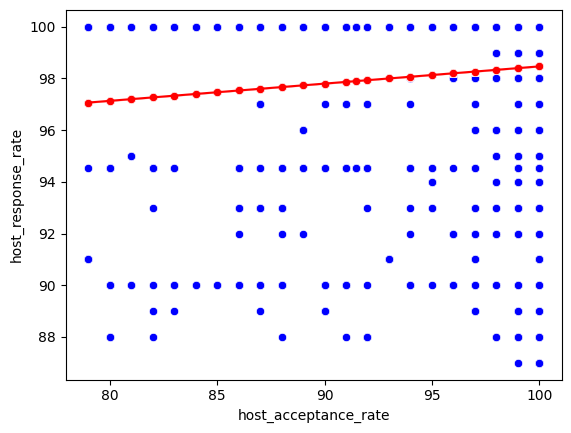

Coeficente de determinación: 0.011105062814228406
Coeficiente de correlación: 0.1053805618424404




Correlación entre review_scores_location y review_scores_cleanliness:


                           review_scores_location  review_scores_cleanliness
review_scores_location                   1.000000                   0.383827
review_scores_cleanliness                0.383827                   1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_location'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.56192977]), 'rank_': 1, 'singular_': array([8.49805264]), 'intercept_': 2.073242783027829}


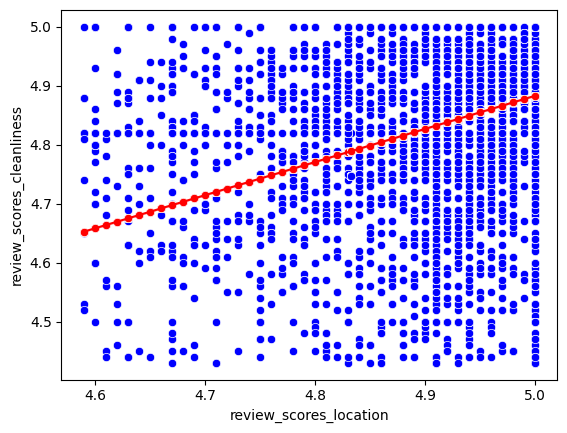

Coeficente de determinación: 0.14732341764373713
Coeficiente de correlación: 0.38382732790115026




Correlación entre host_acceptance_rate y price:


                      host_acceptance_rate     price
host_acceptance_rate              1.000000  0.029369
price                             0.029369  1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([3.0553817]), 'rank_': 1, 'singular_': array([416.98204532]), 'intercept_': 369.9833591337011}


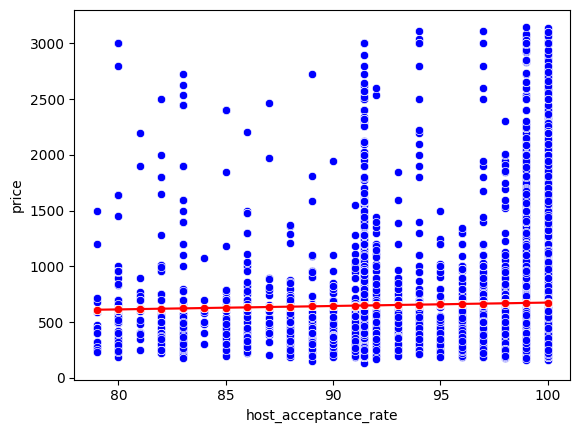

Coeficente de determinación: 0.0008625408064920626
Coeficiente de correlación: 0.02936904503881702




Correlación entre availability_365 y number_of_reviews:


                   availability_365  number_of_reviews
availability_365           1.000000          -0.069438
number_of_reviews         -0.069438           1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.01172875]), 'rank_': 1, 'singular_': array([11333.32566802]), 'intercept_': 17.518691728856894}


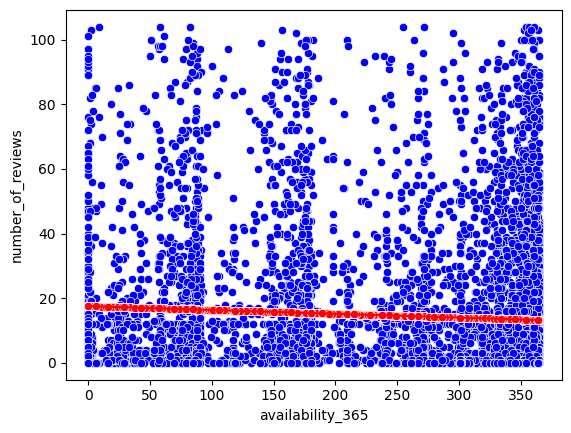

Coeficente de determinación: 0.004821650727525939
Coeficiente de correlación: 0.06943810717124956




Correlación entre host_acceptance_rate y number_of_reviews:


                      host_acceptance_rate  number_of_reviews
host_acceptance_rate              1.000000           0.072532
number_of_reviews                 0.072532           1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.33298517]), 'rank_': 1, 'singular_': array([416.98204532]), 'intercept_': -17.732792606466553}


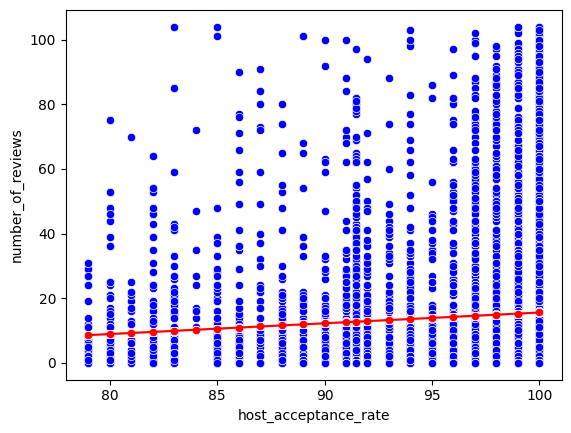

Coeficente de determinación: 0.005260920924889612
Coeficiente de correlación: 0.07253220612176091




Correlación entre reviews_per_month y review_scores_communication:


                             reviews_per_month  review_scores_communication
reviews_per_month                     1.000000                    -0.296151
review_scores_communication          -0.296151                     1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['reviews_per_month'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.03318343]), 'rank_': 1, 'singular_': array([83.34517331]), 'intercept_': 4.930303480675582}


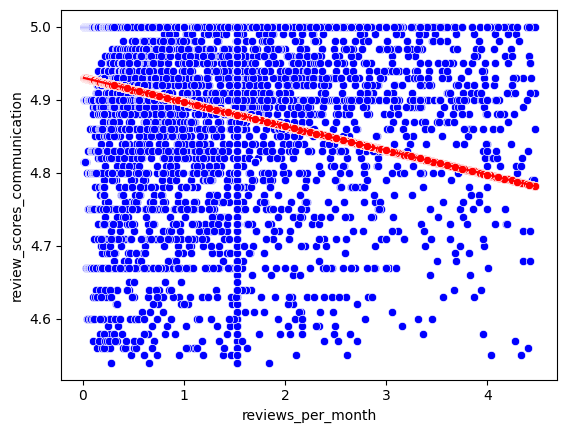

Coeficente de determinación: 0.0877054880775886
Coeficiente de correlación: 0.2961511237148841




df_Hotel_room






Correlación entre host_acceptance_rate y host_response_rate:


                      host_acceptance_rate  host_response_rate
host_acceptance_rate              1.000000            0.233047
host_response_rate                0.233047            1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.10014668]), 'rank_': 1, 'singular_': array([65.20503722]), 'intercept_': 89.24821503823628}


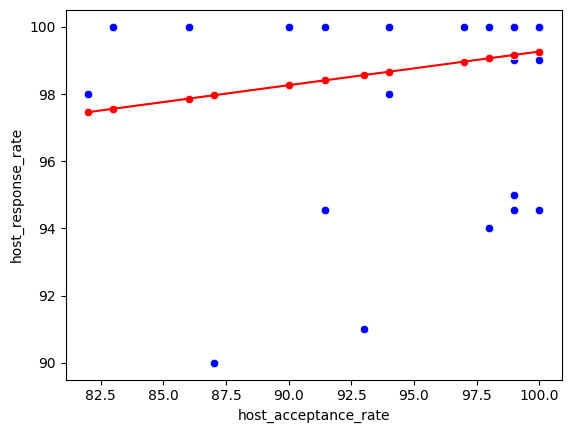

Coeficente de determinación: 0.05431082443923363
Coeficiente de correlación: 0.23304682885470385




Correlación entre review_scores_location y review_scores_cleanliness:


                           review_scores_location  review_scores_cleanliness
review_scores_location                   1.000000                   0.678591
review_scores_cleanliness                0.678591                   1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['review_scores_location'], dtype=object), 'n_features_in_': 1, 'coef_': array([1.20862746]), 'rank_': 1, 'singular_': array([0.93780954]), 'intercept_': -1.1074324088645593}


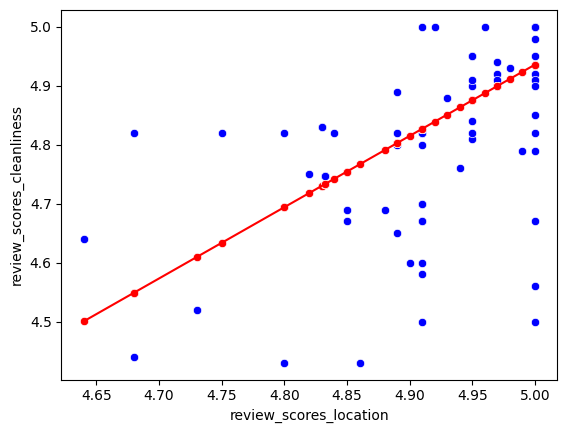

Coeficente de determinación: 0.460485142393792
Coeficiente de correlación: 0.6785905557799873




Correlación entre host_acceptance_rate y price:


                      host_acceptance_rate     price
host_acceptance_rate              1.000000 -0.088341
price                            -0.088341  1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([-12.13397927]), 'rank_': 1, 'singular_': array([65.20503722]), 'intercept_': 2463.852980061585}


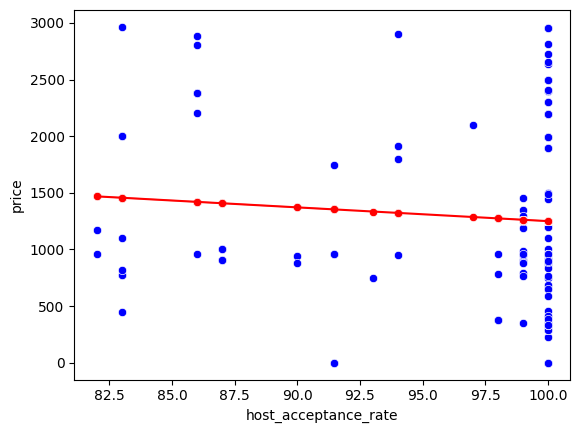

Coeficente de determinación: 0.007804151395738201
Coeficiente de correlación: 0.08834110818717525




Correlación entre availability_365 y number_of_reviews:


                   availability_365  number_of_reviews
availability_365           1.000000           0.066086
number_of_reviews          0.066086           1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['availability_365'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.01193961]), 'rank_': 1, 'singular_': array([1318.27975476]), 'intercept_': 11.309372114008957}


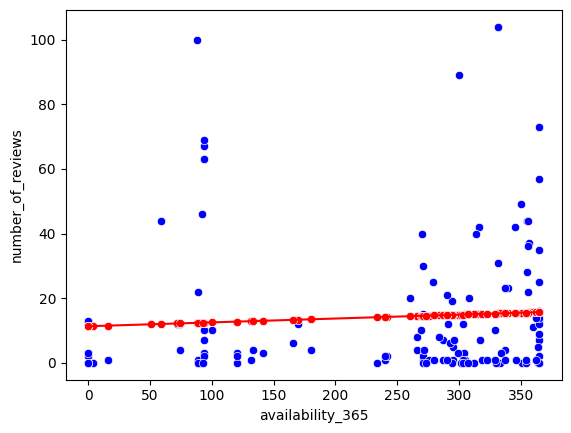

Coeficente de determinación: 0.004367306270326665
Coeficiente de correlación: 0.06608559805529995




Correlación entre host_acceptance_rate y number_of_reviews:


                      host_acceptance_rate  number_of_reviews
host_acceptance_rate              1.000000           0.084005
number_of_reviews                 0.084005           1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['host_acceptance_rate'], dtype=object), 'n_features_in_': 1, 'coef_': array([0.30684051]), 'rank_': 1, 'singular_': array([65.20503722]), 'intercept_': -15.357612077327829}


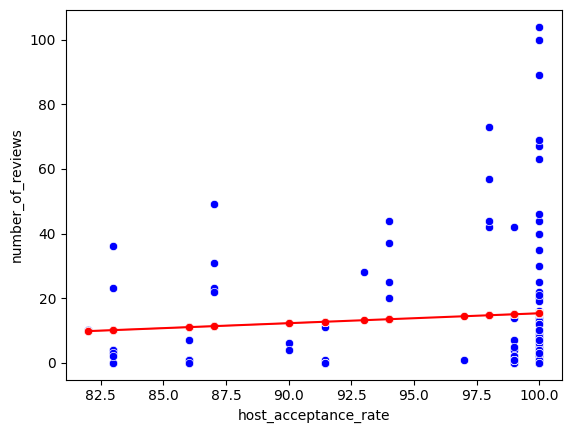

Coeficente de determinación: 0.007056770694194747
Coeficiente de correlación: 0.08400458734018486




Correlación entre reviews_per_month y review_scores_communication:


                             reviews_per_month  review_scores_communication
reviews_per_month                     1.000000                    -0.416534
review_scores_communication          -0.416534                     1.000000


Model dict:  {'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False, 'feature_names_in_': array(['reviews_per_month'], dtype=object), 'n_features_in_': 1, 'coef_': array([-0.06198343]), 'rank_': 1, 'singular_': array([8.7476176]), 'intercept_': 4.924540493985751}


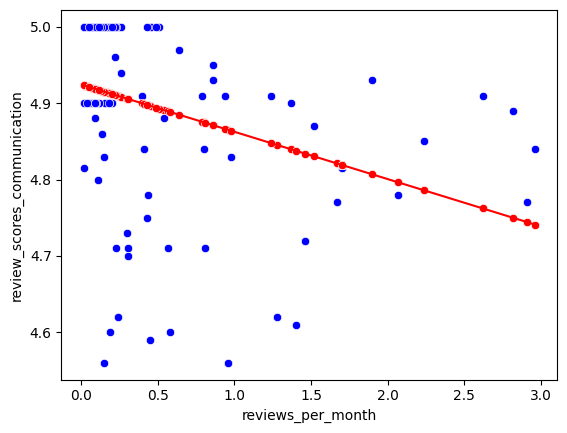

Coeficente de determinación: 0.17350074408388905
Coeficiente de correlación: 0.41653420517874523


In [126]:
# Creamos un diccionario con las columnas que vamos a analizar

cols = {
    'host_acceptance_rate': 'host_response_rate',
    'review_scores_location': 'review_scores_cleanliness',
    'host_acceptance_rate': 'price',
    'availability_365': 'number_of_reviews',
    'host_acceptance_rate': 'number_of_reviews',
    'reviews_per_month': 'review_scores_communication'
}
comparison_list = ['host_acceptance_rate$host_response_rate','review_scores_location$review_scores_cleanliness', 'host_acceptance_rate$price', 'availability_365$number_of_reviews', 'host_acceptance_rate$number_of_reviews', 'reviews_per_month$review_scores_communication']

# Creamos un diccionario para guardar los coeficientes de determinación y correlación de cada tipo de habitación para convertirlo en df

dict_room_type = {
    'df_Private_room': df_Private_room,
    'df_Hotel_room': df_Hotel_room
}

dict_dataframe = {
    'room_type': [],
    'metric': [],
    'coef_det': [],
    'coef_corr': []
}

# Iteramos sobre el diccionario de columnas para mostrar la correlación entre cada par de columnas

for i in dict_room_type.keys():
    print('\n\n')
    # Imprimir en formato de título grande y en color rojo
    print(Fore.BLUE + Style.BRIGHT + '\n\u001b[1m' + f'{i}' + Style.RESET_ALL)
    print('\n')
    #for col_X, col_y in cols.items():
    for j in comparison_list:
        col_X, col_y = j.split('$')
        coef_det, coef_corr = correlacion(dict_room_type[i], col_X, col_y)
        dict_dataframe['room_type'].append(i)
        dict_dataframe['metric'].append(j.replace('$', ' vs '))
        dict_dataframe['coef_det'].append(coef_det)
        dict_dataframe['coef_corr'].append(coef_corr)
    


In [127]:

# Convertimos el diccionario en un df

df_coef = pd.DataFrame(dict_dataframe)
df_coef

,room_type,metric,coef_det,coef_corr
0,df_Private_room,host_acceptance_rate vs host_response_rate,0.011105,0.105381
1,df_Private_room,review_scores_location vs review_scores_cleanl...,0.147323,0.383827
2,df_Private_room,host_acceptance_rate vs price,0.000863,0.029369
3,df_Private_room,availability_365 vs number_of_reviews,0.004822,0.069438
4,df_Private_room,host_acceptance_rate vs number_of_reviews,0.005261,0.072532
5,df_Private_room,reviews_per_month vs review_scores_communication,0.087705,0.296151
6,df_Hotel_room,host_acceptance_rate vs host_response_rate,0.054311,0.233047
7,df_Hotel_room,review_scores_location vs review_scores_cleanl...,0.460485,0.678591
8,df_Hotel_room,host_acceptance_rate vs price,0.007804,0.088341
9,df_Hotel_room,availability_365 vs number_of_reviews,0.004367,0.066086
